# Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

# Import Data from Drive 

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not



In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os 


In [4]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content
total 20K
drwxr-xr-x 1 root root 4.0K Jun  4 18:26 .
drwxr-xr-x 1 root root 4.0K Jun  4 18:21 ..
drwxr-xr-x 1 root root 4.0K Jun  2 16:14 .config
drwx------ 4 root root 4.0K Jun  4 18:26 gdrive
drwxr-xr-x 1 root root 4.0K May 29 18:19 sample_data


In [0]:
os.chdir("/content/gdrive/My Drive/CreditCard")

In [6]:
!wc -l creditcard.csv


284808 creditcard.csv


In [7]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content/gdrive/My Drive/CreditCard
total 144M
-rw------- 1 root root 144M Feb 29 08:20 creditcard.csv


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/gdrive/My Drive/CreditCard/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploring Data

In [0]:
print(creditcard.shape)

(284807, 31)


In [0]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [0]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

In [0]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


In [0]:
creditcard.head

## 2-D Scatter Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


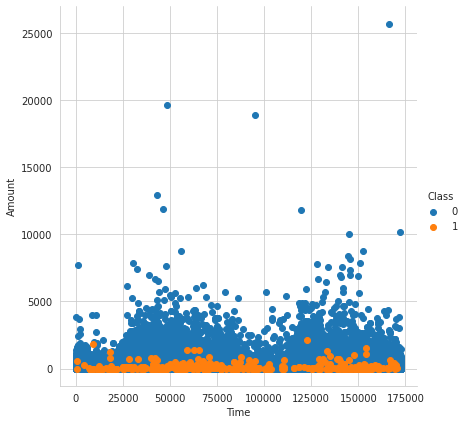

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

## EDA Scatter plot

In [0]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [0]:
FilteredData

In [0]:
print(FilteredData.shape)

(284807, 3)


In [0]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

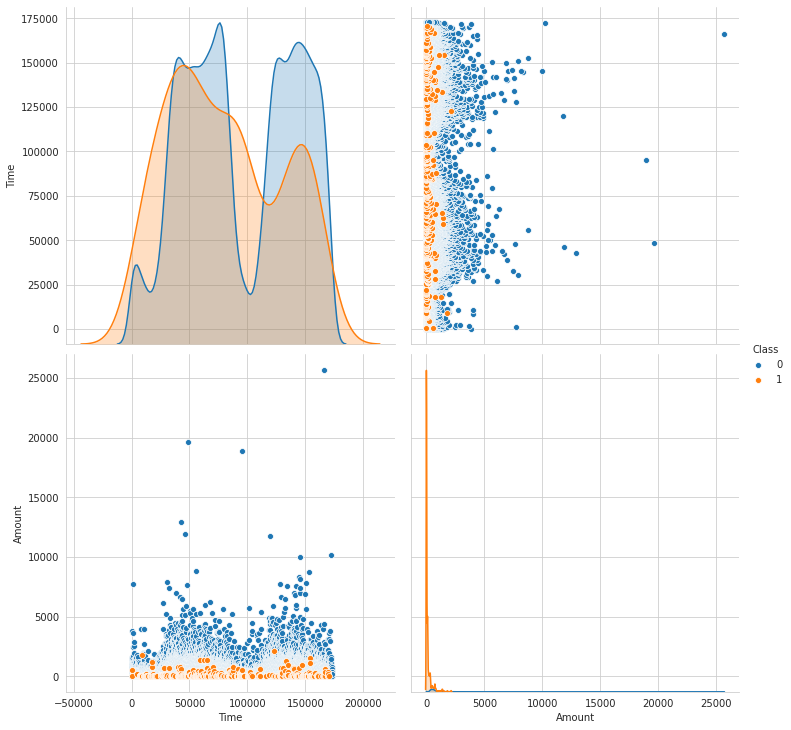

In [0]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", height=5);
plt.show()

In [0]:
countLess = FilteredData[FilteredData.Amount<2500]
countMore= FilteredData[FilteredData.Amount>=2500]
print(countLess.shape[0])
print(countMore.shape[0])

284358
449


In [0]:
## prcentage of trans with amount <2500 is 99.84
percentage = (countLess.shape[0]/FilteredData.shape[0])*100
percentage

99.84234938045763

Observations:

Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [0]:
FilteredData_fruad =FilteredData[FilteredData.Class==1]

countLess = FilteredData_fruad[FilteredData_fruad.Amount<2500]
countMore= FilteredData_fruad[FilteredData_fruad.Amount>=2500]
print(countLess.shape[0])
print(countMore.shape[0])

## prcentage of trans with amount <2500 is 99.84
percentage = (countLess.shape[0]/FilteredData_fruad.shape[0])*100
percentage

492
0


100.0

Observations:

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.  

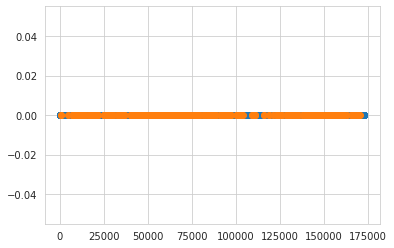

In [0]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

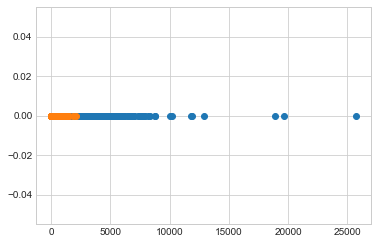

In [0]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

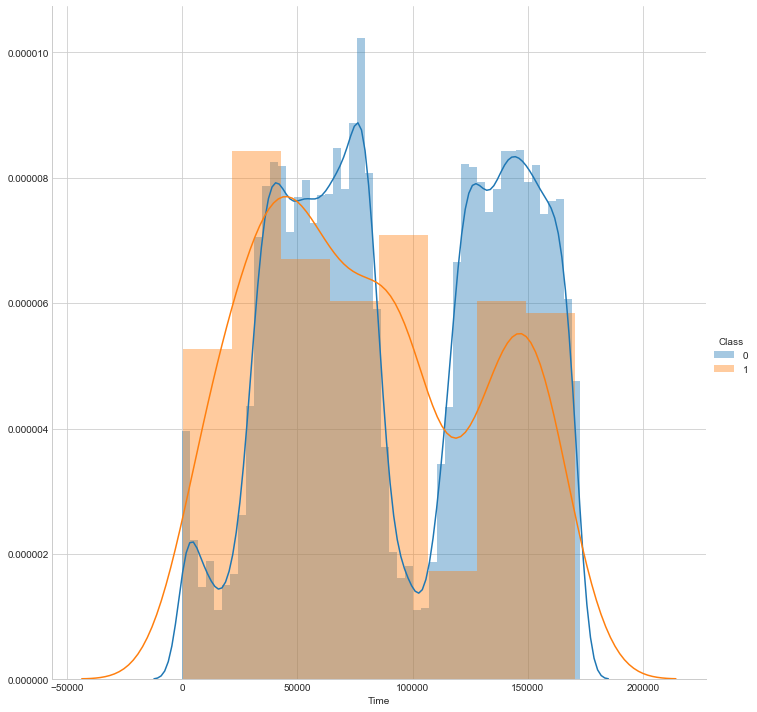

In [0]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

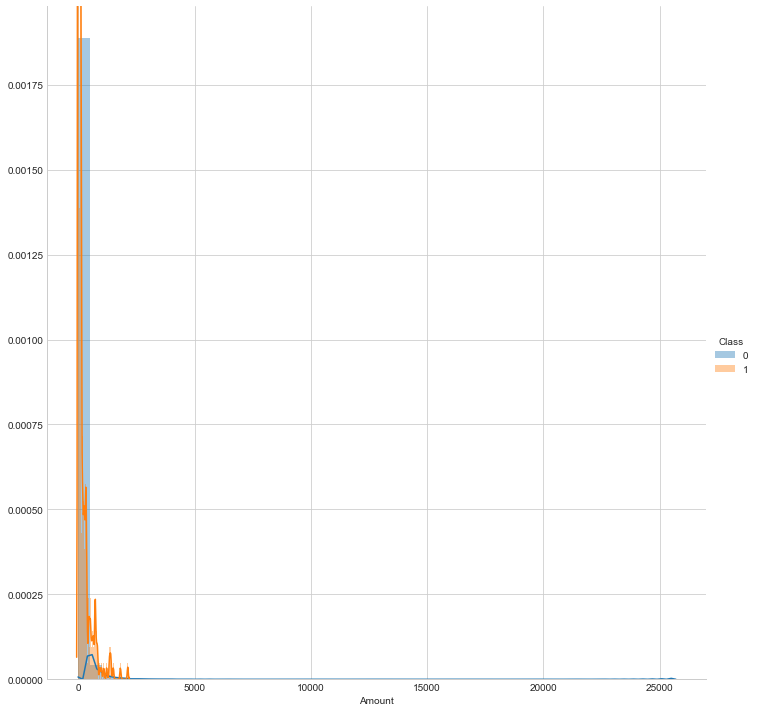

In [0]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

**Hence, this is the best histogram we have**

pdf =  [9.98553406e-01 1.26401388e-03 1.26401388e-04 3.51114966e-05
 7.02229931e-06 3.51114966e-06 0.00000000e+00 7.02229931e-06
 0.00000000e+00 3.51114966e-06]


Counts = [3.88675874e-04 4.92003427e-07 4.92003427e-08 1.36667619e-08
 2.73335237e-09 1.36667619e-09 0.00000000e+00 2.73335237e-09
 0.00000000e+00 1.36667619e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


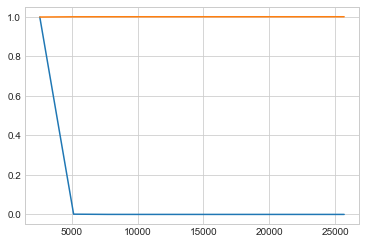

In [0]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

Observations:

Probability of the points having transaction amount approximately less than 2500 is 1, it means almost all of the transactions have transaction amount less than 2500 and cdf curve verifies this fact.

# Mean, Variance and Std-dev

In [0]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [0]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [0]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [0]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


# Box plot and Whiskers

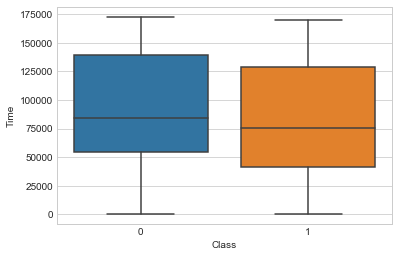

In [0]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

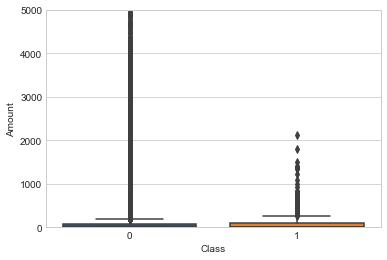

In [0]:
sns.boxplot(x = "Class", y = "Amount", data = creditcard)
plt.ylim(0, 5000)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

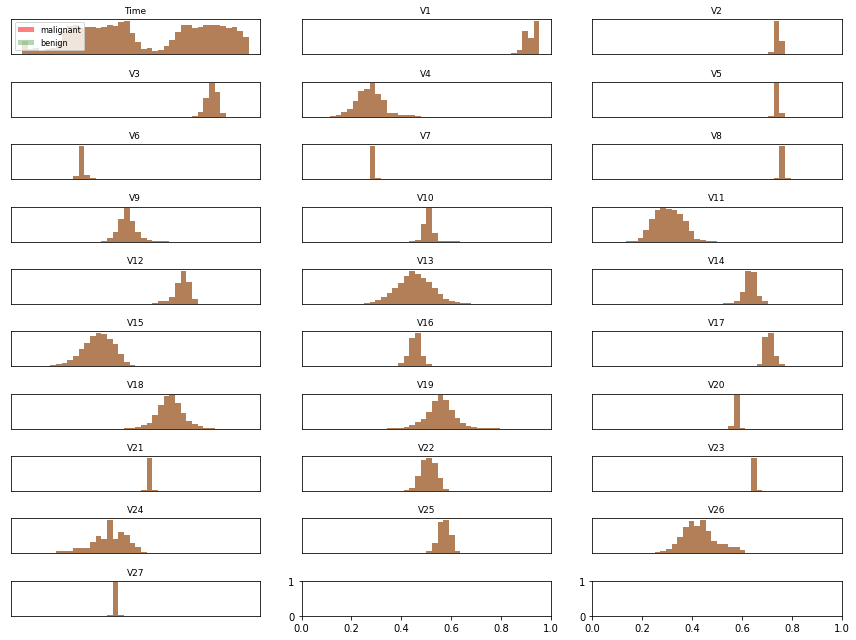

In [31]:
import numpy as np
import matplotlib.pyplot as plt 

# from matplotlib.pyplot import matplotlib
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
genuine=creditcard[creditcard.Class==0] # define malignant
fraud=creditcard[creditcard.Class==0] # define benign
ax=axes.ravel()# flat axes with numpy ravel
 

for i in range(0,28):
  _,bins=np.histogram(creditcard.iloc[:,i],bins=40)
  ax[i].hist(genuine.iloc[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(fraud.iloc[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
  ax[i].set_title(creditcard.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

In [26]:
creditcard.iloc[:,1]

0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284807, dtype: float64

# Descition Tree

In [10]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [0]:
x

In [0]:
y

In [17]:
##  Decision tree
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
ACC_train_dt = model_dt.score(x_train,y_train)
ACC_test_dt = model_dt.score(x_test,y_test)
print(ACC_train_dt*100)
print(ACC_test_dt*100)

100.0
99.89817773252344


In [0]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

In [15]:
from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100])
print(t)

+----------+-------------------+-------------------+
| Accuracy |    Logistic (%)   |       DT (%)      |
+----------+-------------------+-------------------+
| Training | 99.88413175623779 |       100.0       |
| Testing  | 99.88413328183702 | 99.91573329588147 |
+----------+-------------------+-------------------+
